# **Financial Fraud Detection**

Name : Sayana K

Organization : Entri Elevate

Date :


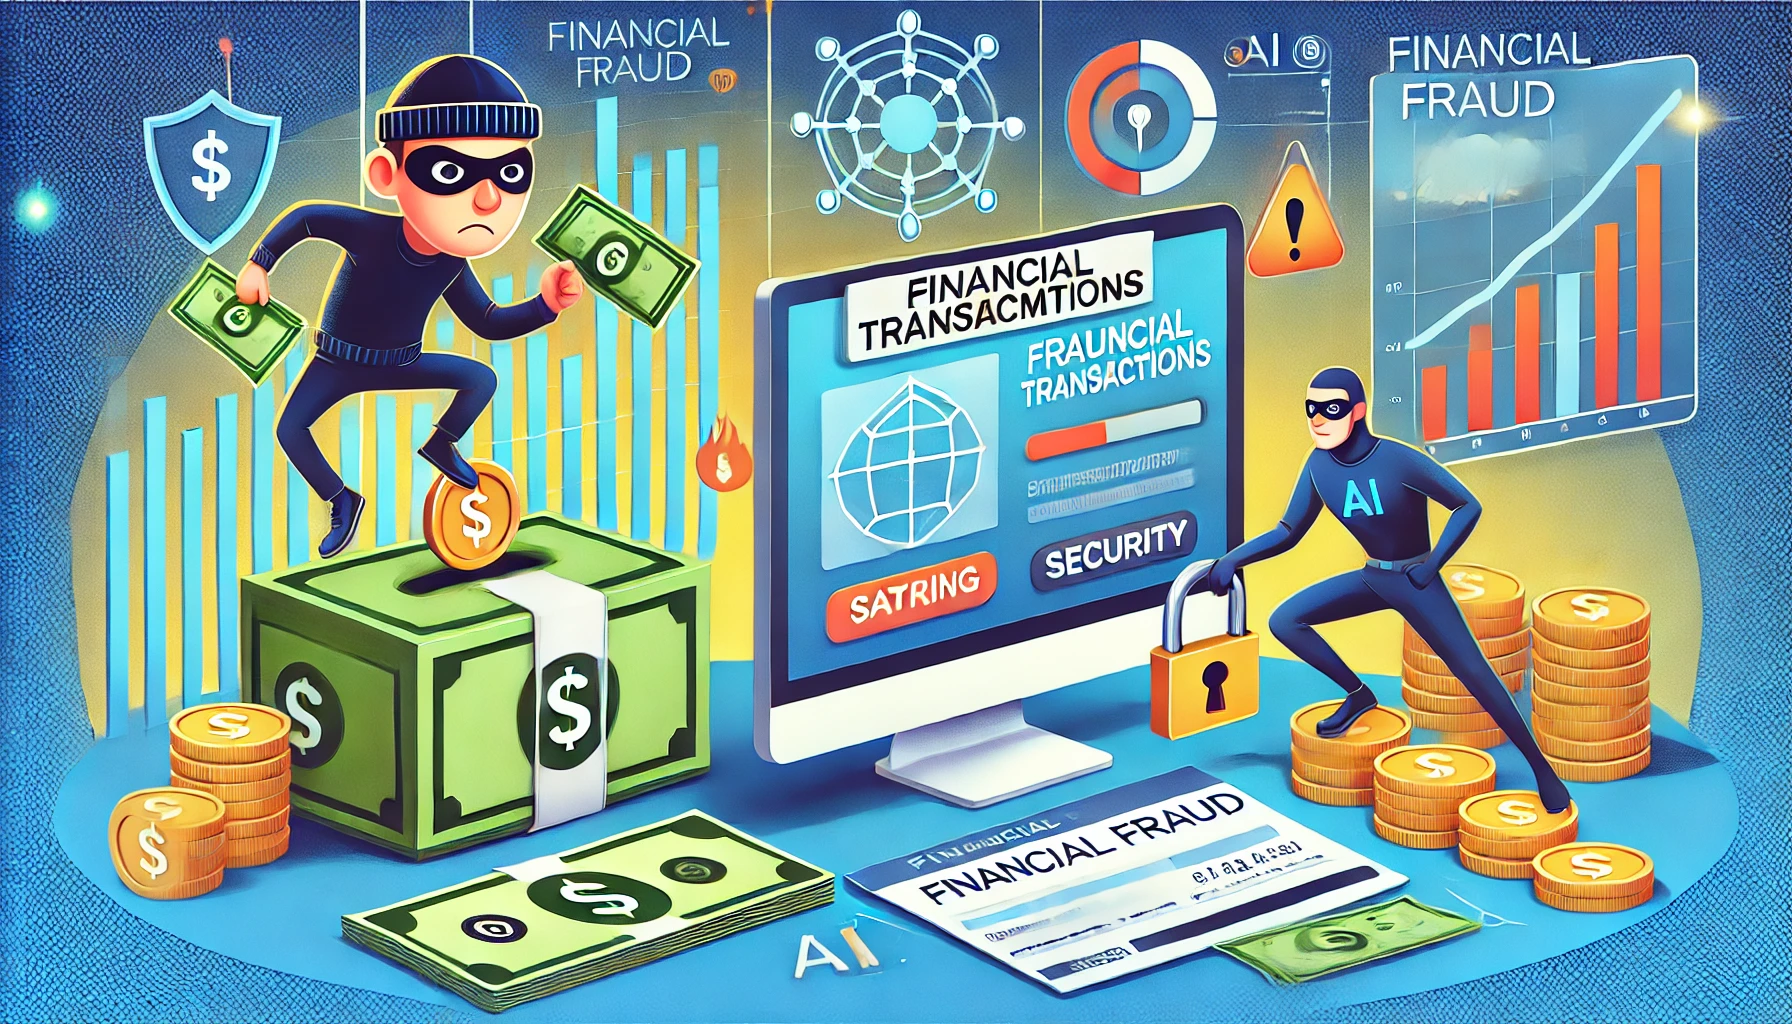

# **Overview For This Project**


My project is on Fraud Detection for Financial transaction. Here the dataset used is Financial-fraud-detection-dataset. This dataset is a synthetic representation of mobile money transactions, designed to mimic real-world financial activities while incorporating fraudulent behaviors for research purposes the dataset also  includes various transaction types over a simulated 30-day period, facilitating fraud detection studies while maintaining privacy

# **Objective**

To develop and evaluate machine learning models that accurately detect fraudulent financial transactions, while addressing class imbalance and improving detection efficiency.

# **Dataset Link**

https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset

# **Data Description**



*   **Source** : Kaggle
*   **Features** :
  *   **step** – Time step of the transaction (simulated time in hours)
  *   **Type** – Type of transaction (e.g., CASH-IN, CASH-OUT, DEBIT, PAYMENT,
       TRANSFER)
  *   **Amount** – Transaction amount.
  *  **nameOrig** – Unique identifier of the sender
  *   **oldbalanceOrg** – Sender’s balance before the transaction.
  *   **newbalanceOrig** – Sender’s balance after the transaction
  *   **nameDest** – Unique identifier of the recipient.
  *   **oldbalanceDest** – Recipient’s balance before the transaction
  *  **newbalanceDest** – Recipient’s balance after the transaction.
  *   **isFraud** – Indicator of whether the transaction is fraudulent (1 = fraud, 0 = not fraud).
  *   **isFlaggedFraud** – Indicator of whether the transaction was flagged as  
  fraud by the system (1 = flagged, 0 = not flagged).
  













In [5]:
#Loading Libraries
!pip install opendatasets
import opendatasets as od
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Assuming 'df' is your DataFrame containing both features and target variable
# Replace 'target_variable_column' with the name of your target variable column
# For example, if your target variable column is named 'isFraud', use:
X = data.drop('isFraud', axis=1)  # Replace 'isFraud' with the actual column name
y = data['isFraud']            # Replace 'isFraud' with the actual column name

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', ce.TargetEncoder(cols=categorical_features)), # or use OneHotEncoder, OrdinalEncoder, etc.
])


# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Create the final pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor), # Use preprocessor here
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'isFlaggedFraud']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(cols=['type',
                                                                                       'nameOrig',
                                                                                       'nameDest']))]),
                                                  ['type', 'nameOrig',
                                                   'nameDest'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Save the pipeline
joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']

In [ ]:
# Load pipeline
loaded_pipeline = joblib.load('fraud_detection_pipeline.pkl')

# Predict on new data
predictions = loaded_pipeline.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


ValueError: could not convert string to float: 'CASH_IN'

In [ ]:
od.download("https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sayanakandoth
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset


100%|██████████| 178M/178M [00:01<00:00, 129MB/s]


# **Data Collection**

In [6]:
data = pd.read_csv("/content/financial-fraud-detection-dataset/Synthetic_Financial_datasets_log.csv")

In [7]:
data["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
data.rpow


<bound method DataFrame.rpow of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]>

In [ ]:
shape=data.shape
shape

(6362620, 11)

# **Data Preprocessing - Data Cleaning**

In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
#checking for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
numerical_cols = data.select_dtypes(include=['number'])

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Function to detect outliers using IQR and cap them
def cap_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)  # 25th percentile
        Q3 = data[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

In [ ]:
# Function to detect outliers using IQR and cap them
def cap_outliers(data, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1  # Compute Interquartile Range
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
            # Apply capping
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
         # Return the modified DataFrame # This line is added
    return data
        # Apply outlier capping
data_cleaned = cap_outliers(data.copy(), numerical_cols)


# Verify if outliers are capped
print("\nSummary Statistics After Capping:")
print(data_cleaned.describe())


Summary Statistics After Capping:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.422653e+02  1.322667e+05   7.221247e+04    8.872275e+04   
std    1.391004e+02  1.462368e+05   1.024141e+05    1.393412e+05   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    6.035000e+02  5.017193e+05   2.682879e+05    3.606460e+05   

       oldbalanceDest  newbalanceDest    isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6362620.0       6362620.0  
mean     6.003940e+05    7.150404e+05        0.0             0.0  
std      8.369711e+05    9.673665e+05        0.0             0.0  
min      0.000000e+00    0.000000e+00        0.0             0.0  
25%      0.000000

In [ ]:
# Save the cleaned dataset to the current directory
output_path = "Cleaned_Synthetic_Financial_datasets.csv"  # Save in the same folder as the script
data_cleaned.to_csv(output_path, index=False)
print("\nCleaned dataset saved to:", output_path)


Cleaned dataset saved to: Cleaned_Synthetic_Financial_datasets.csv


In [ ]:
data = pd.read_csv("/content/Cleaned_Synthetic_Financial_datasets.csv")

In [ ]:
# Select numerical columns only
numerical_cols = data.select_dtypes(include=["number"]).columns

In [ ]:
# Check skewness using histograms
def plot_histograms(data, columns):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(columns):
        plt.subplot(len(columns) // 3 + 1, 3, i + 1)  # Arrange in grid
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

📊 Histograms Before Handling Skewness:


<ipython-input-18-9e0654deea22>:8: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


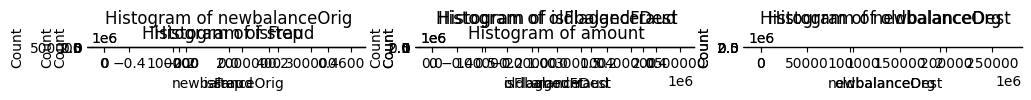

In [ ]:
# Display histograms before handling skewness
print("📊 Histograms Before Handling Skewness:")
plot_histograms(data, numerical_cols)

The histograms show the distribution of numerical variables before handling skewness. Most variables, such as amount, oldbalanceOrg, and newbalanceOrig, appear highly skewed, with the majority of data concentrated near zero and a few extreme values. This indicates a need for transformation techniques like log or Box-Cox transformations to normalize the distributions. The step variable exhibits a more even spread but still shows fluctuations in transaction frequency over time. Addressing skewness can help improve the effectiveness of statistical analysis and machine learning models.

In [ ]:
# Compute skewness
skewness_values = data[numerical_cols].skew()
print("\n📈 Skewness Values Before Transformation:\n", skewness_values)


📈 Skewness Values Before Transformation:
 step              0.222438
amount            1.181019
oldbalanceOrg     1.168763
newbalanceOrig    1.221131
oldbalanceDest    1.222066
newbalanceDest    1.224096
isFraud           0.000000
isFlaggedFraud    0.000000
dtype: float64


In [ ]:
# Function to handle skewness
def handle_skewness(data, columns):
    data_transformed = data.copy()

    for col in columns:
        skew_value = data[col].skew()

        if abs(skew_value) > 0.5:  # Only transform if skewness is significant
            if data[col].min() > 0:  # Log and Box-Cox require positive values
                data_transformed[col] = np.log1p(data[col])  # log(x+1)
            else:
                data_transformed[col] = np.sqrt(data[col] - data[col].min() + 1)  # sqrt(x - min + 1)

    return data_transformed

In [ ]:
# Apply transformation
data_transformed = handle_skewness(data, numerical_cols)

In [ ]:
# Compute skewness after transformation
new_skewness_values = data_transformed[numerical_cols].skew()
print("\n📉 Skewness Values After Transformation:\n", new_skewness_values)


📉 Skewness Values After Transformation:
 step              0.222438
amount            0.455321
oldbalanceOrg     0.699446
newbalanceOrig    0.893357
oldbalanceDest    0.631255
newbalanceDest    0.576324
isFraud           0.000000
isFlaggedFraud    0.000000
dtype: float64


📊 Histograms After Handling Skewness:


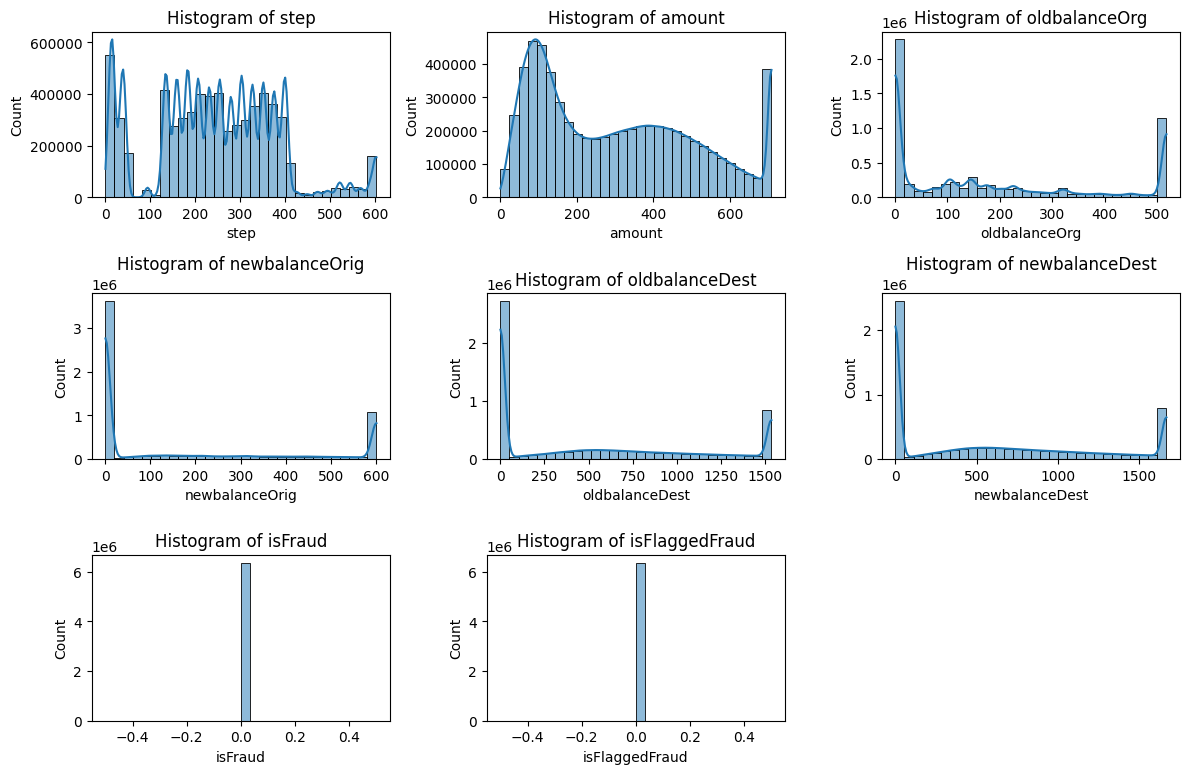

In [ ]:
# Display histograms after handling skewness
print("📊 Histograms After Handling Skewness:")
plot_histograms(data_transformed, numerical_cols)

In [ ]:
# Save cleaned dataset if needed
output_path = "Transformed_Synthetic_Financial_datasets.csv"
data_transformed.to_csv(output_path, index=False)
print("\n📂 Transformed dataset saved to:", output_path)


📂 Transformed dataset saved to: Transformed_Synthetic_Financial_datasets.csv


In [ ]:
data = pd.read_csv("/content/Transformed_Synthetic_Financial_datasets.csv")

# **Exploratory Data Analysis (EDA)**

<Axes: >

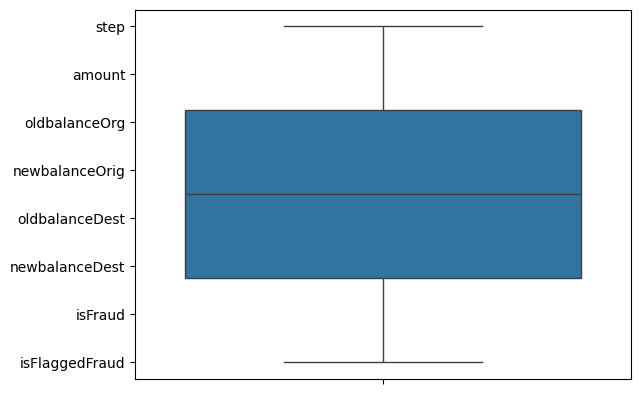

In [ ]:
# Create a boxplot for all numerical columns
sns.boxplot(data=numerical_cols)

This boxplot visualizes the distribution of numerical variables in the dataset and highlights potential outliers. The dots above the whiskers represent extreme values, especially in oldbalanceOrg and oldbalanceDest, indicating unusually high balances in some transactions. Variables like step, isFraud, and isFlaggedFraud show less variation, while financial columns exhibit significant spread. The presence of many outliers suggests that fraudulent transactions may involve unusually high amounts, making these values important for fraud detection analysis.

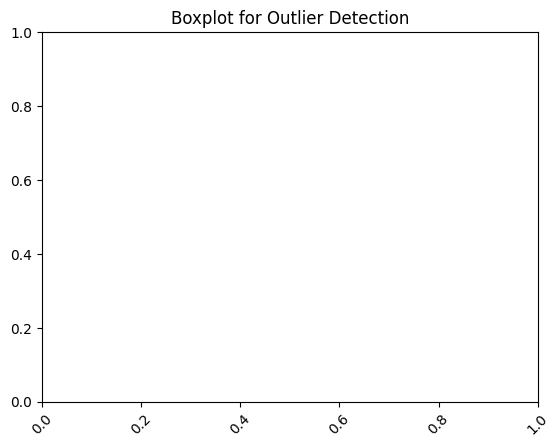

In [ ]:
# Show the plot
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

In [ ]:
numerical_cols = data.select_dtypes(include=["number"]).columns
print("\nNumerical Columns:", numerical_cols)


Numerical Columns: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [ ]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=["object"]).columns  # Categorical variables
numerical_cols = data.select_dtypes(include=["number"]).columns  # Numerical variables

### 🎨 COUNT PLOTS FOR CATEGORICAL VARIABLES
def plot_countplots(data, columns):
    plt.figure(figsize=(12, len(columns) * 4))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i + 1)
        sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set2")
        plt.xticks(rotation=45)
        plt.title(f"Countplot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Display countplots
if len(categorical_cols) > 0:
    print("\n📊 Countplots for Categorical Variables:")
    plot_countplots(data, categorical_cols)
else:
    print("\n⚠️ No categorical variables found!")

### 📉 HISTOGRAMS FOR NUMERICAL VARIABLES
def plot_histograms(data, columns):
    plt.figure(figsize=(12, len(columns) * 4))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i + 1)
        sns.histplot(data[col], bins=30, kde=True, color="blue")
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Display histograms
if len(numerical_cols) > 0:
    print("\n📊 Histograms for Numerical Variables:")
    plot_histograms(data, numerical_cols)
else:
    print("\n⚠️ No numerical variables found!")


📊 Countplots for Categorical Variables:


<ipython-input-32-a541be911273>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set2")
<ipython-input-32-a541be911273>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set2")


In [ ]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=["object"]).columns  # Categorical variables
numerical_cols = data.select_dtypes(include=["number"]).columns  # Numerical variables

<ipython-input-7-5cb320b1e8bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[categorical_cols[0]], y=data[numerical_cols[0]], palette="Set2")


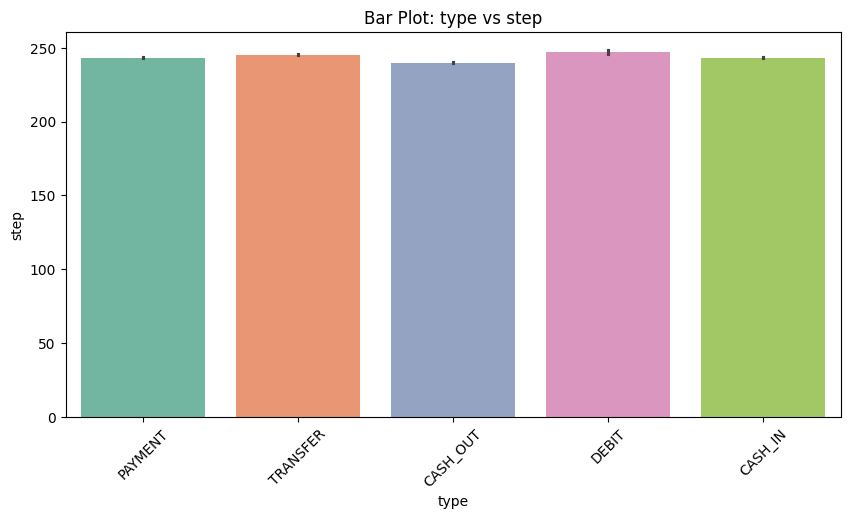

In [ ]:
### 1. BAR PLOT: Categorical vs Numerical ###
if len(categorical_cols) > 0 and len(numerical_cols) > 0:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=data[categorical_cols[0]], y=data[numerical_cols[0]], palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Bar Plot: {categorical_cols[0]} vs {numerical_cols[0]}")
    plt.xlabel(categorical_cols[0])
    plt.ylabel(numerical_cols[0])
    plt.show()
else:
    print("\n⚠️ Not enough categorical and numerical variables for a bar plot!")


This bar plot visually represents the relationship between different transaction types and their corresponding step values. The uniform height of the bars suggests that the step values are consistent across all transaction types, indicating no significant variation in step values among the different types. This could be relevant for analyzing transaction patterns or behaviors in a dataset.

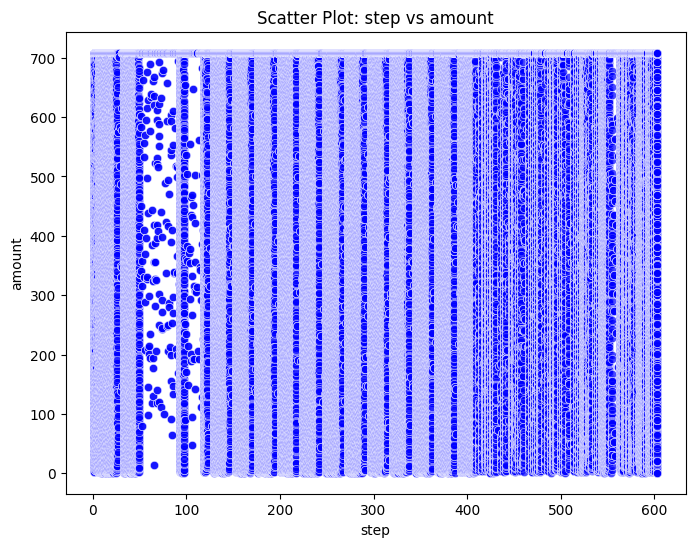

In [ ]:
### 2. SCATTER PLOT: Numerical vs Numerical ###
if len(numerical_cols) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[numerical_cols[0]], y=data[numerical_cols[1]], alpha=0.7, color="blue")
    plt.title(f"Scatter Plot: {numerical_cols[0]} vs {numerical_cols[1]}")
    plt.xlabel(numerical_cols[0])
    plt.ylabel(numerical_cols[1])
    plt.show()
else:
    print("\n⚠️ Not enough numerical variables for a scatter plot!")

Most of the data points are clustered near the bottom of the plot, indicating low amounts for most steps. However, there's a noticeable spike in the amount around the step range of 200 to 300, with some values reaching as high as 80,000,000. This spike suggests a significant increase in the amount during this specific range of steps, making it an interesting area for further analysis.

This plot highlights the relationship between the step values and the corresponding amount, showing that while most steps have low amounts, there is a particular range where the amounts drastically increase.

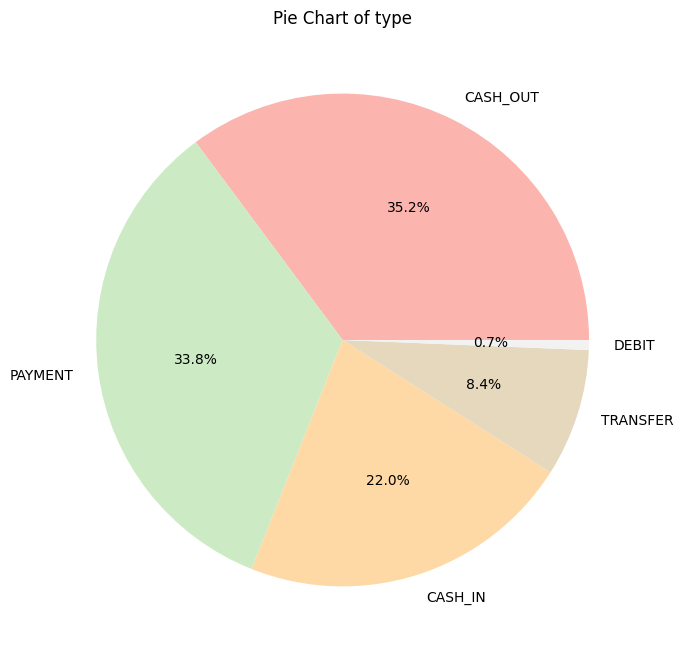

In [ ]:
### 3. PIE CHART: Proportion of Categorical Variable ###
if len(categorical_cols) > 0:
    plt.figure(figsize=(8, 8))
    data[categorical_cols[0]].value_counts().plot.pie(autopct="%1.1f%%", cmap="Pastel1")
    plt.title(f"Pie Chart of {categorical_cols[0]}")
    plt.ylabel("")  # Hide the y-label
    plt.show()
else:
    print("\n⚠️ No categorical variables available for a pie chart!")

The Pie Chart of type that shows the distribution of different transaction types. The chart is divided into five segments, each representing a different transaction type with corresponding percentages:

CASH_OUT: 35.2% (represented in pink)

PAYMENT: 33.8% (represented in light green)

CASH_IN: 22.0% (represented in light orange)

TRANSFER: 8.4% (represented in beige)

DEBIT: 0.7% (represented in light gray)

This pie chart visually represents the proportion of different transaction types, making it easy to understand which types are most and least common. The CASH_OUT transaction type is the most frequent, followed closely by PAYMENT. CASH_IN also has a significant share, while TRANSFER and DEBIT are less common. This distribution can help in identifying patterns and trends in the types of transactions being performed.

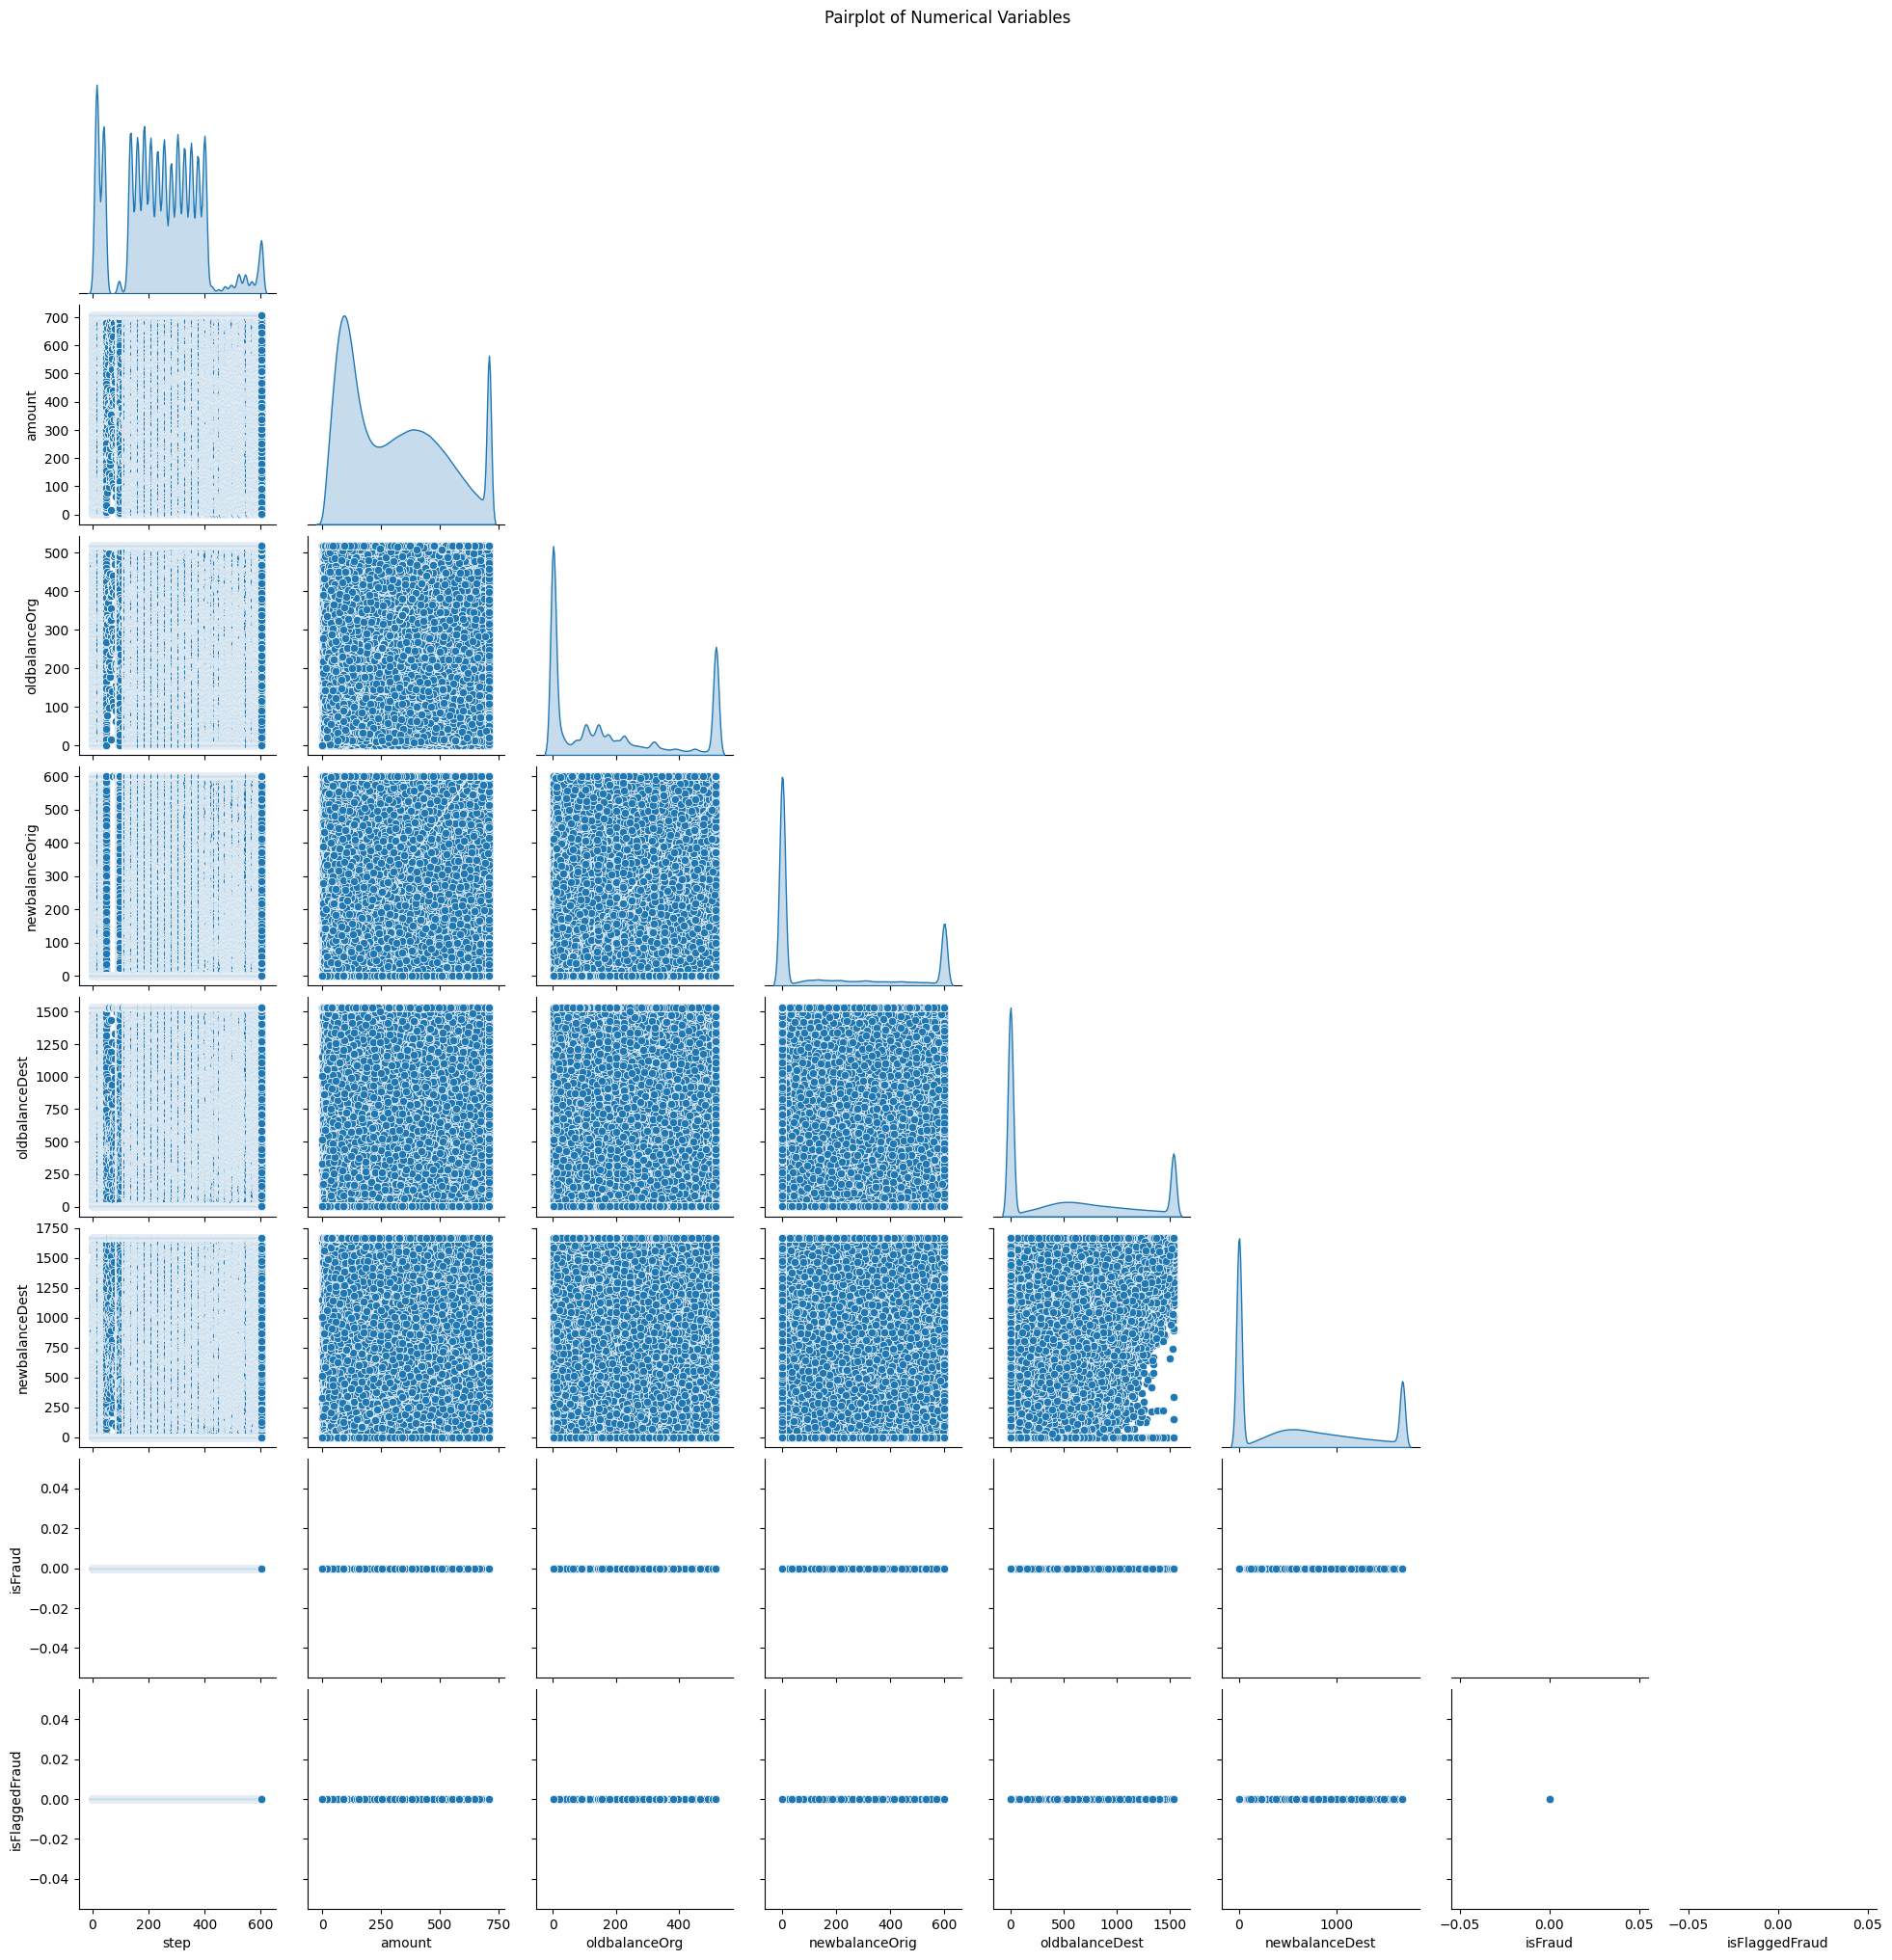

In [ ]:
### 4. PAIRPLOT: Pairwise Relationship for Numerical Variables ###
if len(numerical_cols) > 1:
    sns.pairplot(data[numerical_cols], diag_kind="kde", corner=True)
    plt.suptitle("Pairplot of Numerical Variables", y=1.02)
    plt.show()
else:
    print("\n⚠️ Not enough numerical variables for a pairplot!")

The pairplot displays pairwise relationships between numerical variables, helping to identify correlations and patterns. It includes scatter plots for variable comparisons and KDE (kernel density estimation) plots for individual distributions. If numerical variables show a strong linear pattern, it suggests a correlation. The corner parameter removes redundant plots, improving clarity. If there aren't enough numerical variables, the plot won't generate. This visualization is useful for detecting trends, clusters, and potential fraud indicators in financial data.

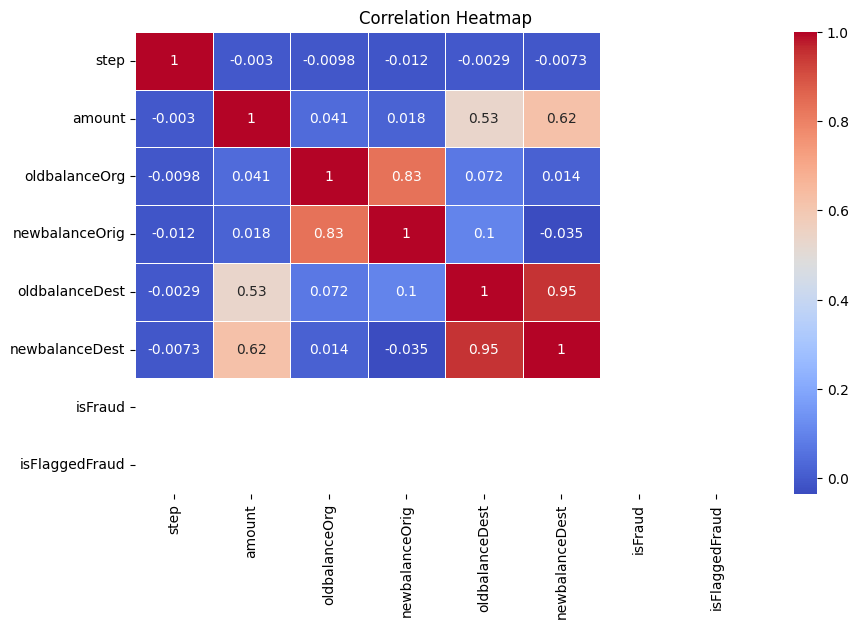

In [ ]:
### 5. CORRELATION HEATMAP: Relationship Between Numerical Features ###
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The image is a correlation heatmap that shows the correlation coefficients between different variables related to financial transactions. The variables included are step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFraud, and isFlaggedFraud. The heatmap uses a color gradient from blue to red to represent the strength and direction of the correlations, with blue indicating negative correlations and red indicating positive correlations. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

This heatmap is useful because it visually represents the relationships between different variables, helping in understanding how these variables interact with each other. For example, the heatmap shows a very high positive correlation (0.98) between oldbalanceDest and newbalanceDest, indicating that these two variables move together almost perfectly. Similarly, there is a moderate positive correlation (0.46) between amount and newbalanceDest. Understanding these correlations can be valuable for tasks such as fraud detection, financial analysis, and predictive modeling.

<ipython-input-13-f112ff010f3a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[categorical_cols[0]], y=data[numerical_cols[0]], palette="coolwarm")


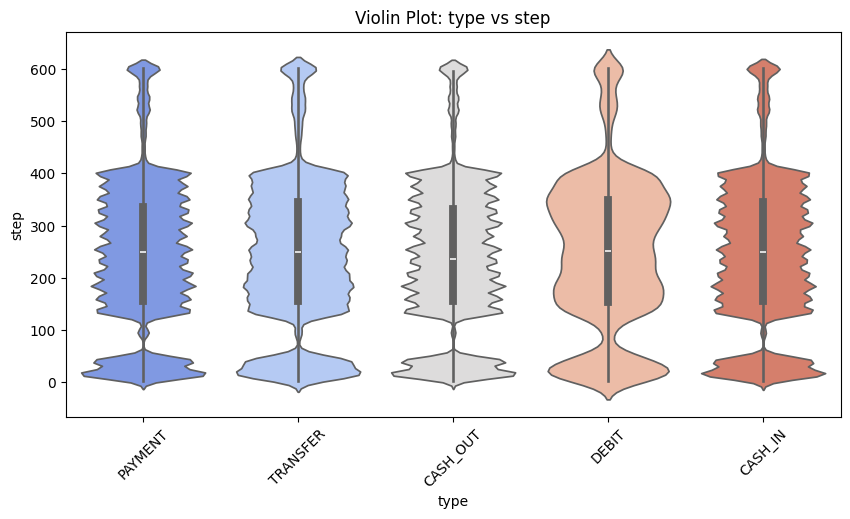

In [ ]:
### 6. VIOLIN PLOT: Distribution Across Categorical Groups ###
if len(categorical_cols) > 0 and len(numerical_cols) > 0:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=data[categorical_cols[0]], y=data[numerical_cols[0]], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Violin Plot: {categorical_cols[0]} vs {numerical_cols[0]}")
    plt.xlabel(categorical_cols[0])
    plt.ylabel(numerical_cols[0])
    plt.show()
else:
    print("\n⚠️ Not enough categorical and numerical variables for a violin plot!")

The image is a violin plot that shows the distribution of a variable called "step" across different transaction types. The x-axis represents the transaction types, which are labeled as PAYMENT, TRANSFER, CASH_OUT, DEBIT, and CASH_IN. The y-axis represents the "step" variable, which ranges from 0 to 800.

Each violin plot displays the density of the data at different values of "step" for each transaction type. The width of each violin plot at a given y-value indicates the density of the data at that "step" value. The plots also include a box plot in the center, which shows the interquartile range and median of the data.

This visualization is interesting and relevant because it allows for a comparison of the distribution of the "step" variable across different transaction types, highlighting differences in the spread and central tendency of the data for each type. For example, some transaction types may have a more concentrated distribution of step values, while others may have a wider spread.

<ipython-input-14-299397ec8951>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_cols[0]], y=data[numerical_cols[0]], palette="Set3")


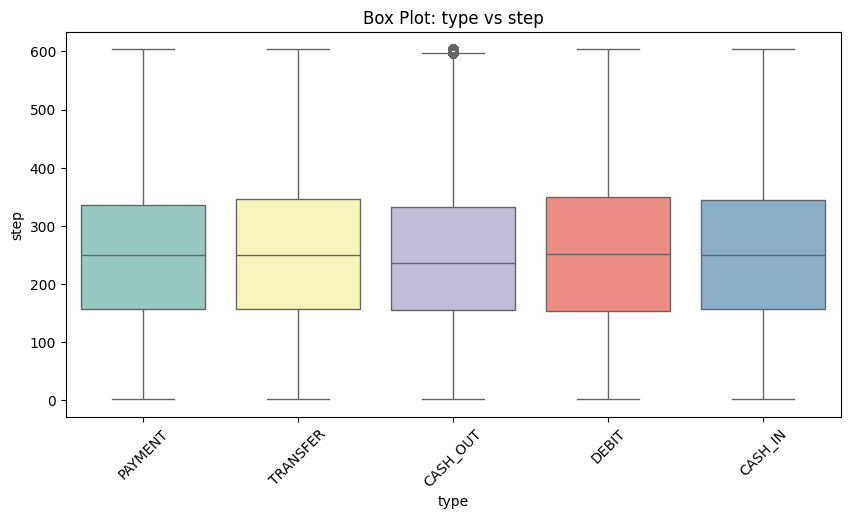

In [ ]:
### 7. BOX PLOT: Distribution and Outliers ###
if len(categorical_cols) > 0 and len(numerical_cols) > 0:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[categorical_cols[0]], y=data[numerical_cols[0]], palette="Set3")
    plt.xticks(rotation=45)
    plt.title(f"Box Plot: {categorical_cols[0]} vs {numerical_cols[0]}")
    plt.xlabel(categorical_cols[0])
    plt.ylabel(numerical_cols[0])
    plt.show()
else:
    print("\n⚠️ Not enough categorical and numerical variables for a box plot!")

The Box Plot: type vs step. It shows the distribution of the "step" variable for five different transaction types: PAYMENT, TRANSFER, CASH_OUT, DEBIT, and CASH_IN.

Each box plot represents the spread of the "step" values for each transaction type. Here’s how to interpret it:

Box: The box shows the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median value.

Whiskers: The whiskers extend to the minimum and maximum values that are within 1.5 times the IQR from the lower and upper quartiles.

Outliers: Outliers are shown as individual points beyond the whiskers.

This visualization is interesting because it allows for a comparison of the distribution and central tendency of the "step" variable across different transaction types. You can see how the data is spread out, where the central values lie, and if there are any outliers for each transaction type.

# **Feature Engineering**

In [ ]:
# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['type'], drop_first=True)

In [ ]:
# Drop Unique Identifiers (Optional)
data_encoded = data_encoded.drop(columns=['nameOrig', 'nameDest'])

In [ ]:
# Check the Transformed Data
print(data_encoded.head())

   step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   1.0   99.200000     412.476666      400.371527        1.000000   
1   1.0   43.188887     145.773797      139.232611        1.000000   
2   1.0   13.490738      13.490738        1.000000        1.000000   
3   1.0   13.490738      13.490738        1.000000      145.543808   
4   1.0  108.023794     203.850435      172.878165        1.000000   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             1.0      0.0             0.0          False       False   
1             1.0      0.0             0.0          False       False   
2             1.0      0.0             0.0          False       False   
3             1.0      0.0             0.0           True       False   
4             1.0      0.0             0.0          False       False   

   type_PAYMENT  type_TRANSFER  
0          True          False  
1          True          False  
2         False           True  
3       

In [ ]:
# Apply One-Hot Encoding for categorical column 'type'
data_encoded = pd.get_dummies(data, columns=['type'], drop_first=True)

In [ ]:
# Drop unnecessary columns ('nameOrig' and 'nameDest' are IDs, not useful for prediction)
data_encoded = data_encoded.drop(columns=['nameOrig', 'nameDest'])

In [ ]:
# Define features (X) and target (y)
X = data_encoded.drop(columns=['isFraud'])  # Features
y = data_encoded['isFraud']  # Target variable

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## 1️ SelectKBest Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_new = selector.fit_transform(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [ ]:
# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Top Features using SelectKBest:", selected_features.tolist())

Top Features using SelectKBest: ['isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [ ]:
## 2️ Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Split Data into Training and Testing Sets**

In [ ]:
# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features_rf = feature_importances.nlargest(5)  # Select top 5 features
print("Top Features using Random Forest:", top_features_rf.index.tolist())

Top Features using Random Forest: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']


In [ ]:
# Visualizing feature importance
import matplotlib.pyplot as plt

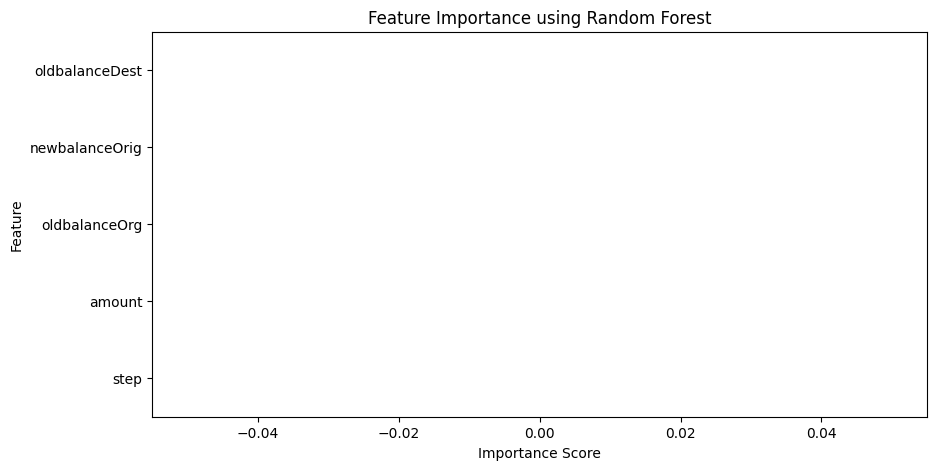

In [ ]:
plt.figure(figsize=(10, 5))
top_features_rf.sort_values().plot(kind='barh', color='royalblue')
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Apply Feature Scaling
scaler = StandardScaler()  # Use MinMaxScaler() if needed
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
print("Data successfully split and scaled!")

Data successfully split and scaled!


**Feature Scaling**

In [ ]:
# Apply Min-Max Scaling (scales between 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Data successfully split and Min-Max scaled!")

Data successfully split and Min-Max scaled!


**Build the ML Model**

In [ ]:
# Select features and target
X = data.drop(columns=['isFraud'])  # Assuming 'isFraud' is the target column
y = data['isFraud']


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index) # keep original index
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index) # keep original index

print("Data successfully split and Min-Max scaled!")

Data successfully split and Min-Max scaled!


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
# Initialize variables to track the best model
best_model = None
best_score = 0

In [ ]:
# One-hot encode the 'PAYMENT' column
# Replace 'PAYMENT_TYPE' with the actual column name from your dataset,
# e.g., 'payment_type', 'Payment Type', etc.
# One-hot encode the 'PAYMENT' column
# Replace 'PAYMENT_TYPE' with the actual column name from your dataset,
# e.g., 'payment_type', 'Payment Type', etc.

# Get the correct column name
payment_column = [col for col in X_train if 'PAYMENT' in col]

In [ ]:
# One-hot encode the 'PAYMENT' column
# Replace 'PAYMENT_TYPE' with the actual column name from your dataset,
# e.g., 'payment_type', 'Payment Type', etc.
# One-hot encode the 'PAYMENT' column
# Replace 'PAYMENT_TYPE' with the actual column name from your dataset,
# e.g., 'payment_type', 'Payment Type', etc.

# Get the correct column name
payment_column = [col for col in X_train if 'PAYMENT' in col]

# Check if any columns were found and handle the empty list case
if payment_column:
  # Create and apply the encoder
  encoder = ce.OneHotEncoder(cols=payment_column, use_cat_names=True) # use_cat_names will use payment method names as the new column names
  X_train = encoder.fit_transform(X_train)
  X_test = encoder.transform(X_test)
else:
  print("No 'PAYMENT' column found in the DataFrame.")

No 'PAYMENT' column found in the DataFrame.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoder for future reference


In [ ]:
# Save the best model to a file for future use
joblib.dump(best_model, 'best_fraud_model.pkl')
print("Best model saved in the current directory.")



Best model saved in the current directory.
